In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2019-12-31'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

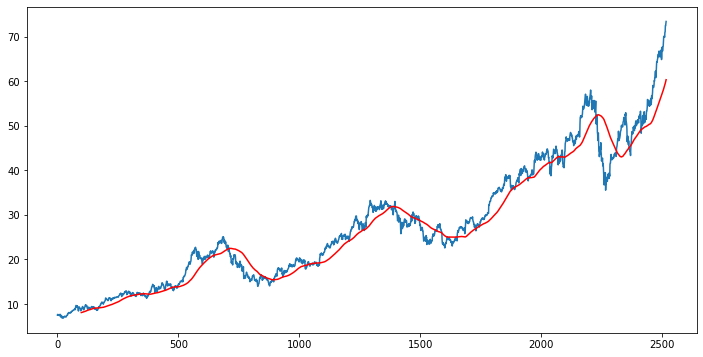

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

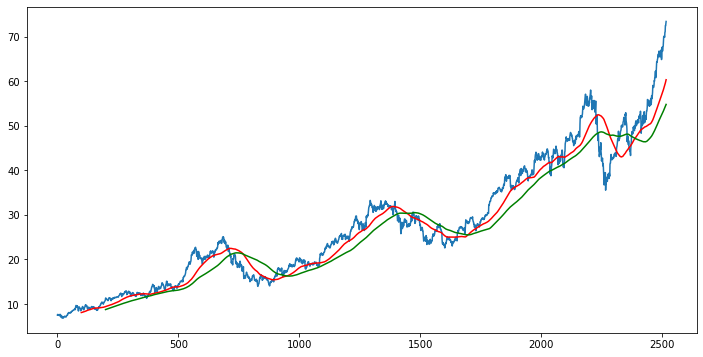

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(756, 1)


In [11]:
 from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ( feature_range = ( 0,1 ) )

In [12]:
data_training_array = scaler.fit_transform ( data_training )
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [13]:
x_train = [ ]
y_train = [ ]
for i in range ( 100 , data_training_array.shape [ 0 ] ) :
    x_train.append ( data_training_array [ i - 100 : i ] )
    y_train.append ( data_training_array [ i , 0 ] )
x_train , y_train = np.array ( x_train ) , np.array ( y_train )

In [14]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential                                          

In [15]:
model = Sequential ( )
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation='relu',return_sequences=True))             
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 34s 323ms/step - loss: 0.0515
Epoch 2/50
52/52 [==============================] - 19s 359ms/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 19s 368ms/step - loss: 0.0095
Epoch 4/50
52/52 [==============================] - 19s 371ms/step - loss: 0.0087
Epoch 5/50
52/52 [==============================] - 19s 375ms/step - loss: 0.0086
Epoch 6/50
52/52 [==============================] - 22s 419ms/step - loss: 0.0081
Epoch 7/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 20s 387ms/step - loss: 0.0074
Epoch 10/50
52/52 [==============================] - 20s 383ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 22s 426ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 38s 730ms/step - loss: 0.0065
Epoch 13/50
5

In [18]:
model.save('keras_model.h5')

In [19]:
past_100_days = data_training.tail(100)

In [20]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12996\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [21]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [22]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [23]:
input_data.shape

(856, 1)

In [24]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [25]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [26]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 107ms/step


In [27]:
y_predicted.shape

(756, 1)

In [28]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [29]:
y_predicted

array([[0.10863739],
       [0.1092346 ],
       [0.10984018],
       [0.11043952],
       [0.11101973],
       [0.11156952],
       [0.1120823 ],
       [0.11255865],
       [0.1130046 ],
       [0.11342791],
       [0.11383757],
       [0.11423934],
       [0.11463684],
       [0.11503457],
       [0.11543526],
       [0.11583941],
       [0.11624652],
       [0.11665498],
       [0.11706376],
       [0.11747807],
       [0.11790305],
       [0.11834219],
       [0.11879513],
       [0.11927052],
       [0.11980885],
       [0.12045032],
       [0.12123306],
       [0.12219283],
       [0.12336069],
       [0.12475862],
       [0.12639695],
       [0.12827522],
       [0.13039096],
       [0.13274124],
       [0.13531592],
       [0.13809563],
       [0.14105767],
       [0.14417809],
       [0.14742705],
       [0.15076962],
       [0.15416983],
       [0.15759139],
       [0.1610141 ],
       [0.16442692],
       [0.16782022],
       [0.17118034],
       [0.1744898 ],
       [0.177

In [30]:
scaler.scale_

array([0.02099517])

In [31]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

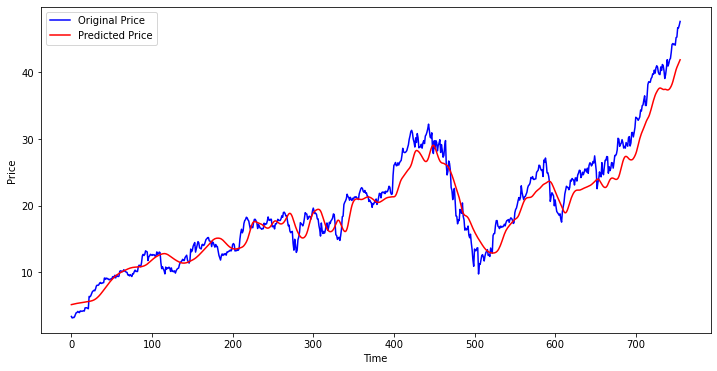

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()